In [3]:
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from models.victim_params import VictimParams
from qiskit.result import marginal_counts

In [4]:
provider = IBMProvider()

# 4 qubits chain with depth 1 Guadalupe

In [5]:
victim_qubits = (5, 8, 11, 14)
snooper_qubits_1 = (3, 9, 13)
snooper_qubits_2 = (2, 12)
snooper_qubits_3 = (1, 10, 15)
ancilla_qubits = (0, 4, 6, 7)

In [25]:
all_snoopers = snooper_qubits_1 + snooper_qubits_2 + snooper_qubits_3

In [6]:
job_id = 'chkqi4dnopt07g344490'

## Fetch data from backend

In [12]:
job = provider.backend.retrieve_job(job_id)
qcs = job.circuits()
counts = job.result().get_counts()

In [13]:
for qc in qcs:
    print(qc.name)

[('c', 'b')]
[('b', 'c')]
[('b', 'a')]
[('c', 'd')]
[('d', 'c')]
[('a', 'b')]
[('b', 'a'), ('c', 'd')]
[('b', 'a'), ('d', 'c')]
[('a', 'b'), ('c', 'd')]
[('a', 'b'), ('d', 'c')]


## Analysis

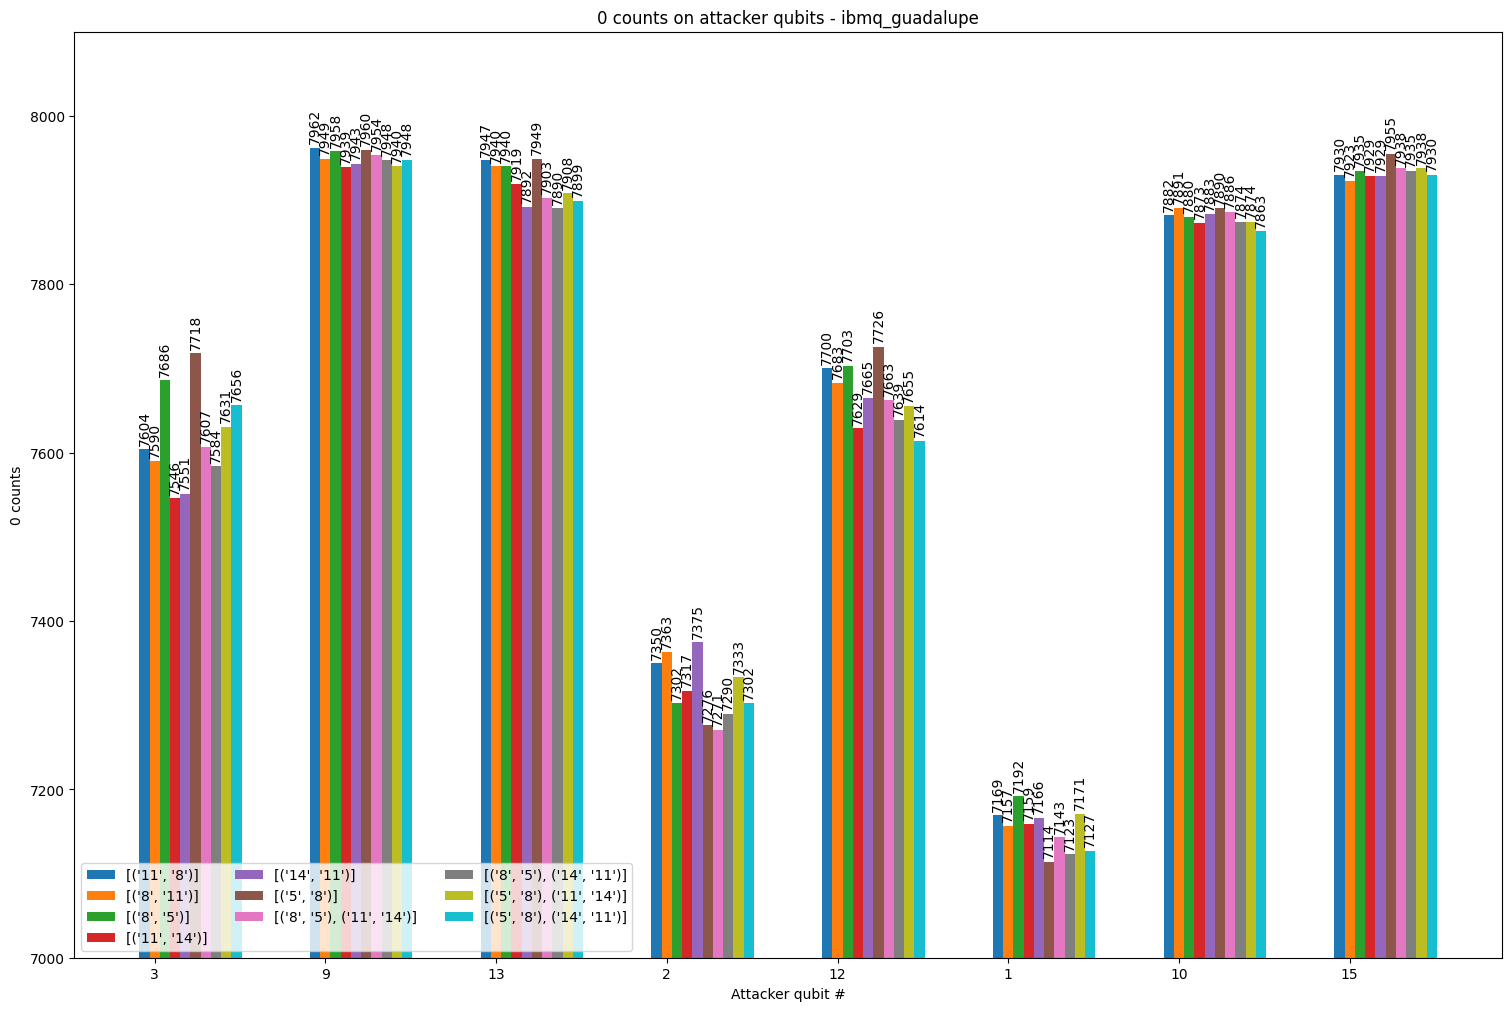

In [69]:
experiments = dict()
for count, qc in zip(counts, qcs):
    name = qc.name
    for letter, victim_qubit in zip(('a', 'b', 'c', 'd'), victim_qubits):
        name = name.replace(letter, str(victim_qubit))
    m_counts = []
    for i, qubit in enumerate(all_snoopers):
        m_counts.append(marginal_counts(count, [i,])['0'])
    experiments[name] = m_counts

x = np.arange(len(all_snoopers))
width = 0.06
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(15, 10))

for attribute, measurement in experiments.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation='vertical')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('0 counts')
ax.set_xlabel('Attacker qubit #')
ax.set_title('0 counts on attacker qubits - ibmq_guadalupe')
ax.set_xticks(x + width, all_snoopers)
ax.legend(loc='lower left', ncols=3)
ax.set_ylim(7000, 8100)

plt.show()